#**Lectura de paquetes y datos**

In [30]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# instalar el paquete prince
# ==============================================================================
!pip install prince

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from prince import ca
from prince import mca

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Pagínas de donde se extrajeron las figuras y para consultar
# ==============================================================================
##    https://napsterinblue.github.io/notes/stats/techniques/correspondence/


ERROR: Operation cancelled by user


In [31]:
# Base de datos  https://www.kaggle.com/liujiaqi/hr-comma-sepcsv
# ==============================================================================

url = 'https://drive.google.com/file/d/1HWPi-Bf0jjc_BMfGaGw-bfYMcKW5LdKQ/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
datos = pd.read_csv(path)

datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [32]:
datos.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


#**ANALISIS DE CORRESPONDENCIAS SIMPLES**

In [33]:
X= datos [['sales',	'salary']]
X.head()

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


**Las columnas ordenan en una tabla de contingencia**

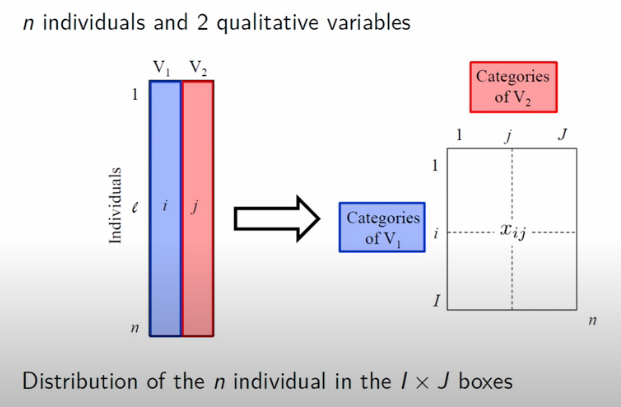

In [34]:
print('-------------------------------')
print('Tabla de contingencia')
print('-------------------------------')

pd.crosstab(index=X['sales'], columns=X['salary'], margins=True)

-------------------------------
Tabla de contingencia
-------------------------------


salary,high,low,medium,All
sales,,,,
IT,83,609,535,1227
RandD,51,364,372,787
accounting,74,358,335,767
hr,45,335,359,739
management,225,180,225,630
marketing,80,402,376,858
product_mng,68,451,383,902
sales,269,2099,1772,4140
support,141,1146,942,2229


**Perfiles filas y columnas**

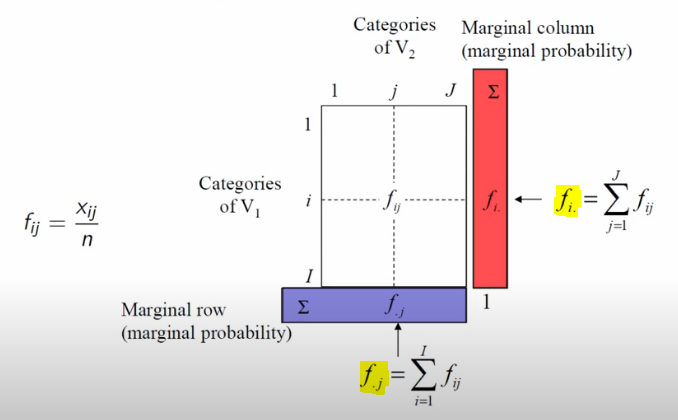

In [35]:
# Perfiles filas (totales columnas)
pd.crosstab(index=X['sales'], columns=X['salary'],).apply(lambda r: r/r.sum(), axis=1) #Axis=0 Totales columnas

salary,high,low,medium
sales,,,
IT,0.067645,0.496333,0.436023
RandD,0.064803,0.462516,0.472681
accounting,0.096480,0.466754,0.436767
hr,0.060893,0.453315,0.485792
management,0.357143,0.285714,0.357143
marketing,0.093240,0.468531,0.438228
product_mng,0.075388,0.500000,0.424612
sales,0.064976,0.507005,0.428019
support,0.063257,0.514132,0.422611


**Perfiles filas**

Las filas pueden ser representadas como $i$ puntos en el espacio de las columnas $R^j$, donde las coordenadas de los puntos son los **perfiles filas**

Perfil fila:  $\frac{f_{ij}}{f_{i.}}\qquad  j = 1,2,...,c  \quad $ 

matricialmente $\bf{R} =\bf{D}_{f}^{-1}\times{\bf{F}}$
donde ${\bf{D}}_{f}^{-1}
 = diag(1/{f_{1\cdot}},1/{f_{2\cdot}},...,1/{f_{f\cdot}})\quad$


 $\bf{r}_{i}^{'}$ representa la fila $i$ de $\bf{R}$

*Centro de gravedad o masa*
$G = \sum\limits_{i = 1}^{f} {\frac{f_{ij}}{f_{i\cdot}}} {f_{i\cdot}}= \lbrace {f_{\cdot j}}\rbrace \quad j = 1,2,...,c$


**Distancia Chi cuadrado de los perfiles fila** 

${{\rm{d}}^2}\left( {i,i^{'}} \right) = {\sum\limits_{{\rm{j = 1}}}^c {\left( {\frac{{{f_{ij}}}}{{{f_{i\cdot}}}} - \frac{{{f_{i^{'}j}}}}{{{f_{i^{'}\cdot}}}}} \right)} ^2}\frac{1}{{{f_{\cdot j}}}} = ({{\bf{r}}_i} - {{\bf{r}}_{i'}}{)^t}{\bf{D}}_c^{ - 1}{\rm{(}}{{\bf{r}}_i} - {{\bf{r}}_{i'}}){\rm{   }}$

donde ${\bf{D}}_{_c}^{ - 1} = diag(1/{f_{.1}},1/{f_{.2}},...,1/{f_{.c}})$

**Distancia euclídea al cuadrado** 

se transforma la distancia chi cuadrado en una distancia euclidea

 $\bf{Z_{f_i}}= \bf{D}_{c}^{1/2} \bf{r}_{i}$ (vectores transformados)

${{\rm{d}}^2}\left( {i,i^{'}} \right) = {\sum\limits_{{\rm{j = 1}}}^c {\left( {\frac{{{f_{ij}}}}{{{f_{i.}}}}\frac{1}{{\sqrt {{f_{.j}}} }} - \frac{{{f_{i^{'}j}}}}{{{f_{i^{'}\cdot}}}}\frac{1}{{\sqrt {{f_{.j}}} }}} \right)} ^2}{\rm{ }}$

**Matriz de los datos transformados**

$\bf{Z_f} =\bf{R} \bf{D}_{c}^{-1/2} = {\bf{D}}_{f}^{-1}{\bf{F}} \bf{D}_{c}^{-1/2}$ donde cada elemento 

$z_{f_{ij}} = \frac{f_{ij}}{f_{i.}}\frac{1}{f_{.j}^{1/2}}$
es la frecuencia relativa por fila estandarizada por su variabilidad (raíz cuadrada de la frecuencia relativa por columna)

La Matriz de los datos transformados permite la proyección de las filas  preservando la distancia entre ellas.  

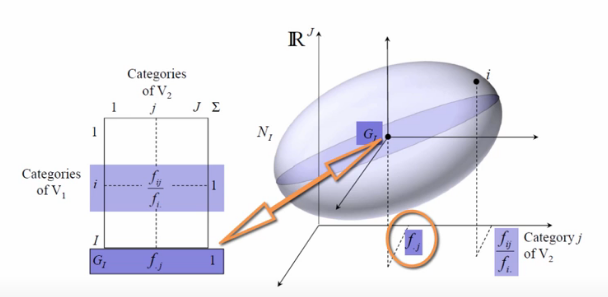

In [36]:
# Perfiles columnas  (totales filas)
pd.crosstab(index=X['sales'], columns=X['salary'],).apply(lambda r: r/r.sum(), axis=0) #Axis=0 Totales columnas

salary,high,low,medium
sales,,,
IT,0.067098,0.083242,0.082997
RandD,0.041229,0.049754,0.057710
accounting,0.059822,0.048934,0.051970
hr,0.036378,0.045790,0.055693
management,0.181892,0.024604,0.034905
marketing,0.064673,0.054948,0.058331
product_mng,0.054972,0.061646,0.059417
sales,0.217462,0.286905,0.274899
support,0.113985,0.156643,0.146137



**Perfiles columna**
Las columnas pueden ser representadas en el espacio  de las filas $R_f $, donde las coordenadas de los puntos son los **perfiles columnas**

Perfil columna: $\frac{f_{ij}}{f_{.j}}\quad \quad i = 1,2,...,f$

matricialmente ${\bf{PC}} = {\bf{D}}_{_c}^{ - 1}{\bf{F}}'$

*Centro de gravedad*: $G = \sum\limits_{{\rm{j = 1}}}^c {\frac{{{f_{ij}}}}{{{f_{.j}}}}} {f_{.j}}{\rm{  = }}\left\{ {{f_{i.}}} \right\}\quad i = 1,2,...,f$

Distancia euclídea al cuadrado de los vectores transformados $\bf{Z_c} = {\bf{D}}_{_c}^{ - 1}{\bf{F}}{\bf{D}}_{_f}^{ - 1/2}$ donde cada elemento es $z_{c_{ij}}^* = \frac{{{f_{ij}}}}{{{f_{.j}}}}\frac{1}{{{f_{i.}}^{1/2}}}$

${{\rm{d}}^2}\left( {j,j^{'}} \right) = {\sum\limits_{{\rm{i = 1}}}^{\mathop{\rm f}\nolimits}  {\left( {\frac{{{f_{ij}}}}{{{f_{.j}}}}\frac{1}{{\sqrt {{f_{i.}}} }} - \frac{{{f_{ij'}}}}{{{f_{.j^{'}}}}}\frac{1}{{\sqrt {{f_{i.}}} }}} \right)} ^2}{\rm{ }}$



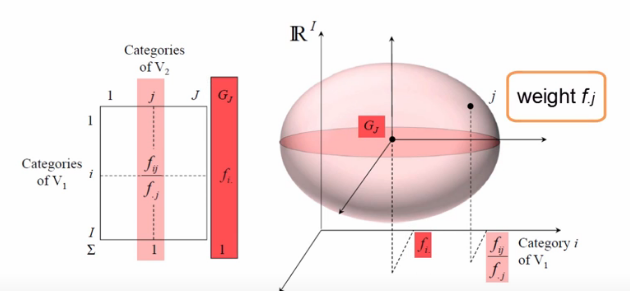

**Proyección de las filas**

Para proyectar las filas de $\bf{Z_f}$ ponderadas por su frecuencia relativa sobre un vector, se debe encontrar un vector $\textbf{a}$ de norma unidad $\bf{a}^{'}\bf{a}=1$ ,en un espacio de menor dimensión de modo que el vector proyectado sobre esta dirección $\bf{y}_f=\bf{Z_f * a}$ tenga variabilidad máxima (se maximiza la suma de cuadrados ponderada) 

$m=\bf{a}^{'} \bf{Z_f}^{'}\bf{D}_{f}{\bf{Z_f a}}$ (función a maximizar)

se define una matriz 
${\bf{Z}} = {\bf{D}}_{_f}^{ - 1/2}{\bf{FD}}_{_c}^{ - 1/2} $ con componentes $z_{ij}^{} = \left\{ {\frac{{{f_{ij}}}}{{\sqrt {{f_{i.}}{f_{.j}}} }}} \right\}$\
La expresión a maximizar se expresa como 

$\bf{a{'}Z{'}Za}$ donde $\bf{Z}^{'}{\bf{Za}} = \lambda {\bf{a}}$

El mayor valor propio siempre es 1, esta solución trivial se descarta y se analiza a partir del siguiente valor propio.

Coordenadas Filas:  ${\bf{C}_f} = {\bf{Z_fA}} $

$\bf{A}$ contiene las columnas de los vectores propios

**Proyección de las columnas**

Distancia euclídea de los vectores transformados $\bf{Z_c} = {\bf{D}}_{_c}^{ - 1}{\bf{F}}{\bf{D}}_{_f}^{ - 1/2}$ donde cada elemento es $z_{c_{ij}}^* = \frac{{{f_{ij}}}}{{{f_{.j}}}}\frac{1}{{{f_{i.}}^{1/2}}}$

${{\rm{d}}^2}\left( {j,j^{'}} \right) = {\sum\limits_{{\rm{i = 1}}}^{\mathop{\rm f}\nolimits}  {\left( {\frac{{{f_{ij}}}}{{{f_{.j}}}}\frac{1}{{\sqrt {{f_{i.}}} }} - \frac{{{f_{ij'}}}}{{{f_{.j^{'}}}}}\frac{1}{{\sqrt {{f_{i.}}} }}} \right)} ^2}{\rm{ }}$

La proyección de máxima variabilidad
${\bf{a}}'{{\bf{Z_c}}}'{\bf{D}}_{_c}{{\bf{Y}}^*}{\bf{a}}={\bf{a}}'{\bf{D}}_f^{ - 1/2}{\bf{F}}'{\bf{D}}_c^{ - 1}{\bf{FD}}_f^{ - 1/2}{\bf{a}}$

Las direcciones de proyección son los vectores propios de la matriz

${\bf{ZZ}} = {\bf{D}}_{_f}^{-1/2}{\bf{FD}}_{c}^{-1}{\bf{F}}{\bf{D}}_{f}^{-1/2}$ donde ${\bf{Z}} = {\bf{D}}_{f}^{-1/2}{\bf{FD}}_{c}^{-1/2}$

\[{\bf{Z}}{\bf{Z}}^{'}b = \lambda b\]
Coordenadas Columnas: $\bf{C_c =Z_c*B =D}_c^{1}{\bf{F}}^{'}{\bf{D}}_f^{-1/2}{\bf{*B}}$ \\
${\bf{B}}$ contiene las columnas de los vectores propios

#**Resumen**

**El procedimiento**
1.   caracteriza las líneas (filas o columnas) por su frecuencia relativas condicionadas consideradas puntos en el espacio
2.   Define una distancia ($\chi^2$) entre las líneas considerando la precisión de cada una.
3.   Proyecta los puntos sobre direcciones de máxima variabilidad teniendo en cuenta el peso de cada frecuencia relativa 

**Se resuelve**
1. Calculando la matriz $\bf{Z}^{'}\bf{Z}$ ( perfiles filas) y$\bf{Z}\bf{Z}^{'}$  (perfiles columnas)}
2. Considerando los vectores propios correspondientes a los mayores valores propios menores que la solución trivial igual a 1
3. Calculando las proyecciones y representarlas gráficamente


In [37]:
X["count"] = 1

T = pd.pivot_table(X, values='count', index=['sales'], columns=['salary'], aggfunc=np.sum, fill_value=0)
print(T)
print(type(T))




salary       high   low  medium
sales                          
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147
<class 'pandas.core.frame.DataFrame'>


In [38]:

from prince import CA

##ca=CA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=2,   n_iter=10, random_state=None)

ca=CA( n_components=2)
ca.fit(T)




CA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=2,
   n_iter=10, random_state=None)

In [39]:
%pylab inline

display(ca.row_coordinates(T))


Populating the interactive namespace from numpy and matplotlib


,0,1
IT,-0.053679,0.005099
RandD,-0.054993,0.079716
accounting,0.053981,0.022013
hr,-0.066248,0.104859
management,1.005351,-0.004417
marketing,0.042276,0.023322
product_mng,-0.027707,-0.014471
sales,-0.065652,-0.012944
support,-0.073427,-0.025092
technical,-0.034003,-0.021332


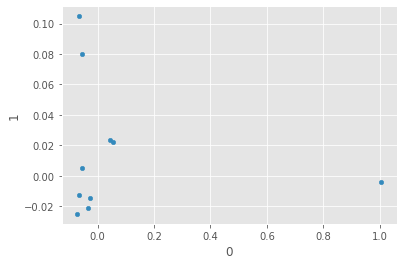

In [40]:
ca.row_coordinates(T).plot.scatter(0, 1);

In [41]:
display(ca.column_coordinates(T))


,0,1
high,0.706735,-0.013795
low,-0.088828,-0.032018
medium,-0.034807,0.038987


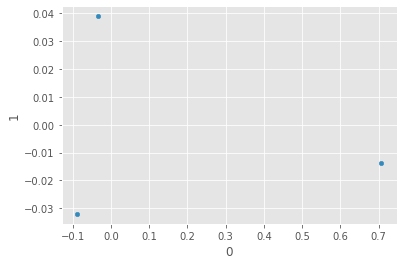

In [42]:
ca.column_coordinates(T).plot.scatter(0, 1);

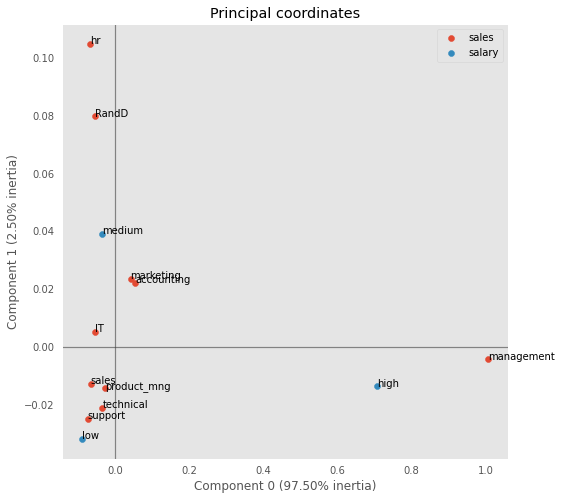

In [43]:
ca.plot_coordinates(T,figsize=(8, 8));

In [44]:
ca.eigenvalues_

[0.045562126571251534, 0.001168944942994394]

In [45]:
ca.total_inertia_

0.04673107151424593

In [46]:

ca.explained_inertia_

[0.974985702122451, 0.025014297877549035]

#**Correspondencias múltiples**
Si se simboliza con la letra $p$ el total de modalidades de las s variables (3
o más), se construye una Tabla Disyuntiva $Z$ de orden $n × s$ que cuenta
con $n$ filas y $p$ columnas, y sus elementos $y_{ij}$ puede asumir sólo dos valores cero o uno.
Las frecuencias marginales por filas son iguales al múumero de preguntas ($s$)
Las frecuencias marginales de las columnas son la frecuencia de la
modalidad ($j$) de la pregunta ($q$)
La suma de las columnas de las categor´ıas de una variable (subtabla)
el total es $n$
A partir de la tabla disyuntiva completa se puede construir la tabla de
contingencia de Burt ($B_{(p;p)} = Z.Z$ ) que contiene todas las tablas de
contingencia simples entre las variables (cruzadas dos a dos).
Estas tablas son equivalentes y producen los mismos factores.


https://rpubs.com/bogotan/AMESP6ACM

In [47]:
print('-----------------------')
print('Base de datos con variables: Work_accident,promotion_last_5years ,sales,salary')
print('-----------------------')
XM= datos [['Work_accident','promotion_last_5years','sales','salary']]
XM.head()

-----------------------
Base de datos con variables: Work_accident,promotion_last_5years ,sales,salary
-----------------------


,Work_accident,promotion_last_5years,sales,salary
0,0,0,sales,low
1,0,0,sales,medium
2,0,0,sales,medium
3,0,0,sales,low
4,0,0,sales,low


**Mirando los datos**

In [48]:

# tabla de frecuencia de Work_accident
pd.value_counts(XM['Work_accident'])

0    12830
1     2169
Name: Work_accident, dtype: int64

In [49]:
# tabla de frecuencia de promotion_last_5years
pd.value_counts(XM['promotion_last_5years'])

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [50]:
# tabla de frecuencia de sales
pd.value_counts(XM['sales'])

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [51]:
# tabla de frecuencia de sales
pd.value_counts(XM['salary'])

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

**Función MCA del la librería prince (instalar)**

https://pypi.org/project/prince/
https://napsterinblue.github.io/notes/stats/techniques/mca/


In [60]:
from prince import MCA
mca = MCA(n_components=4)

mca = mca.fit(XM) 

print(mca)


MCA(benzecri=True, check_input=True, copy=True, engine='auto', n_components=4,
    n_iter=10, random_state=None)


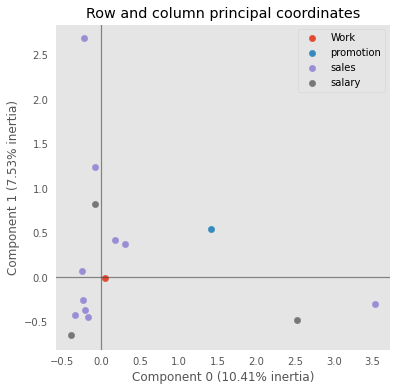

In [61]:
ax = mca.plot_coordinates(
     X=XM,
     ax=None,
     figsize=(6, 6),
     show_row_points=False,
     row_points_size=7,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=40,
     show_column_labels=False,
     legend_n_cols=1
     )

In [53]:
mca.eigenvalues_

[0.5660545785494145,
 0.4914659609446381,
 0.47766102121365006,
 0.47614574177569235]

In [54]:
mca.total_inertia_

2.75

In [55]:
mca.explained_inertia_
sum(mca.explained_inertia_)

0.7313917463575982

Ejercicio 
repetir con la siguiente base de datos


1. Title: Balloon databases

2. Source: Michael Pazzani (pazzani@ics.uci.edu)

3. Past usage
   Pazzani, M. (1991). The influence of prior knowledge on concept acquisition: 
   Experimental and computational results. Journal of Experimental Psychology: 
   Learning, Memory & Cognition, 17, 3,  416-432.

4. Relevant information:
   There are four data sets representing different conditions of an experiment.
   All have the same attributes.
   a. adult-stretch.data  Inflated is true if age=adult or act=stretch
   b. adult+stretch.data  Inflated is true if age=adult and act=stretch
   c. small-yellow.data   Inflated is true if (color=yellow and size = small) or
   d. small-yellow+adult-stretch.data  Inflated is true if 
            (color=yellow and size = small) or (age=adult and act=stretch)
 
5. Number of attributes: 4

6. Number of Instances: 16

7. Attribute Information: (Classes Inflated T or F)
   Color             yellow, purple
   size              large, small
   act               stretch, dip
   age               adult, child
   inflated          T, F

8. Missing Values: None


In [63]:

X = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/adult+stretch.data')
X.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']
X

,Color,Size,Action,Age,Inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,F
2,YELLOW,SMALL,DIP,ADULT,F
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,LARGE,STRETCH,ADULT,T
5,YELLOW,LARGE,STRETCH,ADULT,T
6,YELLOW,LARGE,STRETCH,CHILD,F
7,YELLOW,LARGE,DIP,ADULT,F
8,YELLOW,LARGE,DIP,CHILD,F
9,PURPLE,SMALL,STRETCH,ADULT,T
